In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
# Read it and print the first five rows
cvss_data = pd.read_csv('2020cvss_score.csv')

In [3]:
cvss_data = cvss_data.drop(columns=["Unnamed: 0"])
cvss_data.head()

,attackVector,attackComplexity,privilegesRequired,userInteraction,confidentialityImpact,integrityImpact,availabilityImpact,score
0,0.55,0.44,0.62,0.85,0.66,0.66,0.66,7.8
1,0.85,0.44,0.85,0.62,0.66,0.66,0.66,8.8
2,0.55,0.77,0.62,0.62,0.66,0.66,0.66,6.7
3,0.55,0.44,0.62,0.85,0.00,0.00,0.66,5.5
4,0.55,0.44,0.27,0.85,0.66,0.66,0.66,6.7


In [4]:
columns = ["attackVector","attackComplexity", "privilegesRequired","userInteraction","confidentialityImpact","integrityImpact",	"availabilityImpact"]

### 1 -  First, let's take a deeper look into our datasets. Plot the distribution of severity scores for the dataset. Compute also the minimum, maximum, mean, median, and mode statistics for the severity scores. 

/home/gimpel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


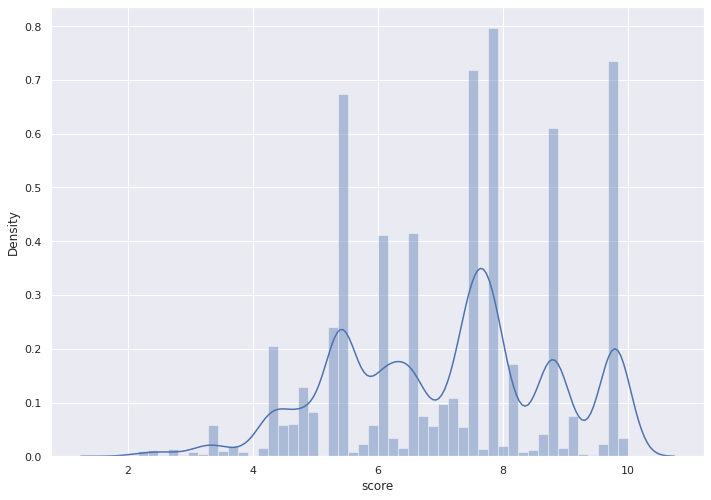

Min: 2.0
Max: 10.0
Mean: 7.12188602442413
Median: 7.5
Mode: 7.8
Skewness: -0.16497741386686712


In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(cvss_data['score'], bins=50)
plt.show()

print("Min:", min(cvss_data['score']))
print("Max:", max(cvss_data['score']))
print("Mean:", np.mean(cvss_data['score']))
print("Median:", np.median(cvss_data['score']))
print("Mode:", max(set(cvss_data['score']), key=list(cvss_data['score']).count))
print("Skewness:", stats.skew(cvss_data['score']))

### Analysing data
Understanding the information that the calculation showed us

> $Min = 2.0$ - The minimum score was 2, therefore we have vulns with LOW score

> $Max = 10.0$ - In our dataset we have vulnerabilities with CRITICAL score

> According to these informations below, we should be concerned because most of our sample is on a HIGH score, which is not good news

> $Mean= 7.12$

> $Median = 7.5$ 

> $Mode = 7.8$ 


> $Skewness < 0 $ - Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.The skewness is between -0.5 and 0.5, the data are fairly symmetrical.

### 2 - Plot each feature in the dataset versus the severity score and see if there is a clear correlation between them

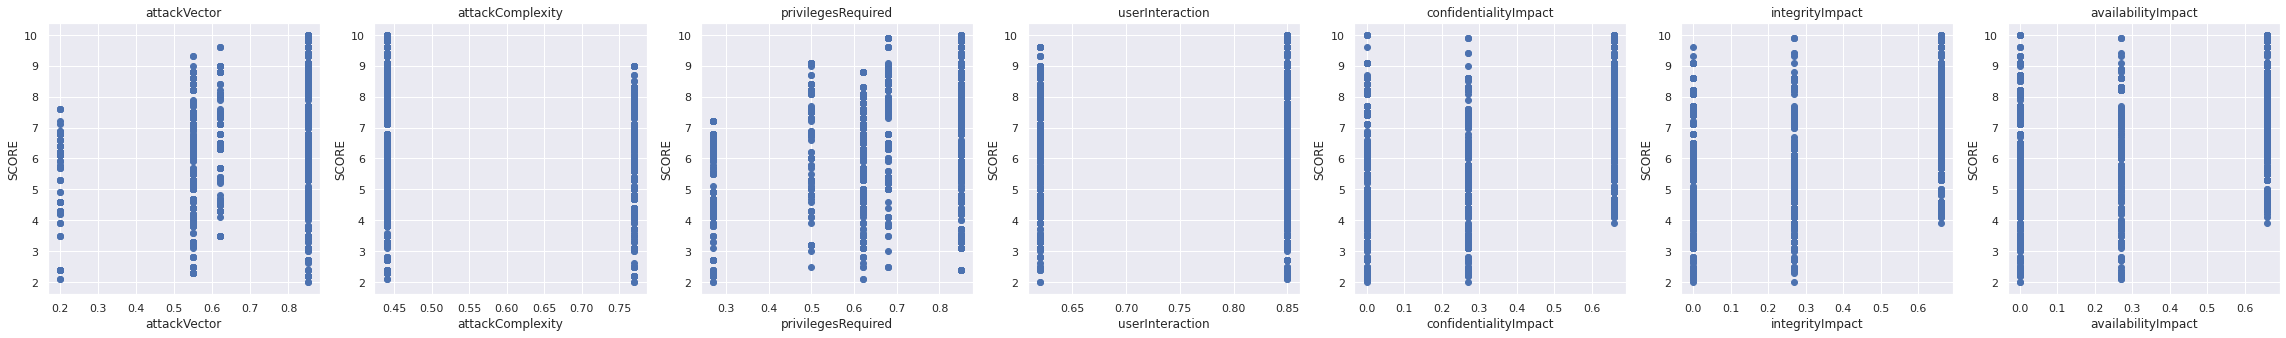

In [6]:
plt.figure(figsize=(40, 5))

features = [c for c in columns]
target = cvss_data["score"]
d = []
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = cvss_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('SCORE')

### Analysing plot

***First of all we must remember that the CVSS Score is a combination of all of these metrics***

> $Attack Vector X Score$ - As expected we concentrate the attack vector at the top(7 plus),the higher a score indicates that the device is more insecure on the network, which allows for greater exploitation.


> $Attack Complexity X Score$ - This shows that some higher score can have low attack complexity, on the other side the Base Score is greatest for the least complex attacks.

> $Privileges Required X Score$ - We can see that the Base Score is greatest if no privileges are required, that is, "inversely proportional".

> $User Interaction X Score$ - As expected the density concentrates at 0.85 it's when no UI is necessary and then become easier to exploit so higher the score.

> About the impacts below:
    > The higher your scores, the higher your Base Score

> $Confidentiality Impact X Score$

> $Integrity Impact X Score$

> $Availability Impact X  Score$ 

### 3 - Train a linear regressor on the data using cross-validation and compute both the MSE and R². Show both metrics for each fold and the final average performance.

___

## Linear Regression

Linear regression models try to fit a linear function (i.e. a line) to predict the desired outcome.

One of the most popular and simple examples of Linear Regression is the [**Least Squares Linear Regression**](https://medium.com/swlh/linear-regression-c03718bfe9a3). This type of model looks for the line that minimizes the sum of squared distances of the training points to the line. i.e.

![Residuals.png](https://miro.medium.com/max/346/1*SfZpl4HO9BVcze999KVIYA.png)

We have the objects in the training set as blue dots and the distances to the fit line in red. The goal of the model is to find the line that minimizes the square of this distance.



In [7]:
# It is common practice in machine learning to call data X and labels y
X_train, X_test, y_train, y_test = model_selection.train_test_split(
      cvss_data[[c for c in columns]].values,
      cvss_data[["score"]].values,
      test_size=0.2
    )

print("Training and test sizes:", X_train.shape, X_test.shape)

Training and test sizes: (11792, 7) (2948, 7)


In [8]:
#TRAINING
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg

LinearRegression()

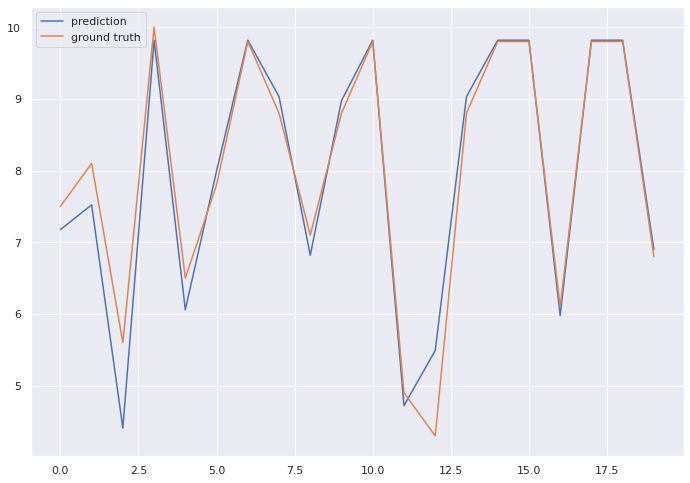

In [9]:
y_preds  = linear_reg.predict(X_test)

point_indices = range(20)
plt.plot(point_indices, y_preds[-20:], label="prediction")
plt.plot(point_indices, y_test[-20:], label="ground truth")
plt.legend()

### Analysing the graph

> $Result$ - As we can see it's not a perfect match but it presents a truly good result given these training and test sets.

In [10]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

X, y = cvss_data[[c for c in columns]].values, cvss_data[["score"]].values

print("Total samples:", X.shape[0])
for train_indices, test_indices in kf.split(X):
  print("Split:", train_indices.shape, test_indices.shape, test_indices[:5])

Total samples: 14740
Split: (11792,) (2948,) [ 8 10 25 28 29]
Split: (11792,) (2948,) [ 0 12 13 16 17]
Split: (11792,) (2948,) [ 1  5  9 19 20]
Split: (11792,) (2948,) [ 3  4 11 14 15]
Split: (11792,) (2948,) [ 2  6  7 22 23]


### Coefficient of Determination

Although we can use MSE to have a sense of our model's performance, by itself, it is not a very intuitive metric. For instance, if we simply measure MSE and get ```MSE = 30``` is that good or bad?

A more intuitive metric we can is the [**Coefficient of Determination**](https://www.youtube.com/watch?v=nk2CQITm_eo&feature=share), often called the R².

The computation of R² is based on the concept of variation, which measures an average distance between data points and a baseline value, usually the mean of the data. R² produces a quality metric for our model by comparing the variation around the mean of the data to the variation around the model:

$$R^2 = \frac{Var(mean) - Var(model)}{Var(mean)} =  1 - \frac{\sum_{i=1}^n (y^{truth}_i - y^{pred}_i)^2}{\sum_{i=1}^n (y^{truth}_i - \overline{y^{mean}})^2}$$

Intuitively, R² tells us **how much of the variance of the data is explained by our model**. In a simpler view, we can interpret R² as how much better our model is compared to just taking the mean of the data and using that as a prediction.


In [11]:
linear_reg = LinearRegression()
mses = []
for train_indices, test_indices in kf.split(X):
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  linear_reg.fit(X_train, y_train)

  y_preds_train  = linear_reg.predict(X_train)
  y_preds_test  = linear_reg.predict(X_test)

  train_mse = mean_squared_error(y_preds_train, y_train)
  test_mse = mean_squared_error(y_preds_test, y_test)
  print("Training:", train_mse)
  print("Test:", test_mse, "\n")

  mses.append(test_mse)

print("Average test MSE:", np.mean(mses))

Training: 0.23869358764402338
Test: 0.24333478929069818 

Training: 0.23992729140879987
Test: 0.2384115396433793 

Training: 0.2392424580464939
Test: 0.24123617602103953 

Training: 0.23896052858303274
Test: 0.24227494269565897 

Training: 0.24097468555905255
Test: 0.23438208398806537 

Average test MSE: 0.23992790632776825


### Analysing MSE

> $ MSE = 0.23994442349459214 $ - As we can see our model is fairly robust, the distance is lower than 24.

R² always gives us a value between $-\infty$ and $1$. A good model has $R^2$ near $1$. When $R^2$ is negative it means its better to predict using the average of already observed data than what the regressor is producing.

R² is a very good metric to assess the quality of our model, but in practice, we compute a slightly different version of R² called [**Adjusted R²**](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914). The difference between these two is that the adjusted R² also takes into account how many features we have in our data, reducing the R² of models with too many features. This penalizes models that use too many features, encouraging us to use simpler models. In practice, the adjusted R² is computed as:

$$R^2_{adjusted} = =  1 - \left( (1 - R^2) * \frac{n - 1}{n - k - 1} \right)$$

Where $n$ is the number of data points and $k$ is the number of features. You can read more about the R² metrics and other useful metrics [here](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914).

Let's take a look at the R² for our linear regressor.

In [12]:
def adjusted_r2_score(y_preds, y_label, num_features):
  r2 = r2_score(y_preds, y_label)
  adjusted_r2 = (1 - (1 - r2) * ((y_label.shape[0] - 1)/(y_label.shape[0] - num_features - 1)))
  return adjusted_r2

num_features = X.shape[1]
linear_reg = LinearRegression()
r2s = []
adjusted_r2s = []
for train_indices, test_indices in kf.split(X):
  print("Fold", len(r2s))
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  linear_reg.fit(X_train, y_train)

  y_preds_train  = linear_reg.predict(X_train)
  y_preds_test  = linear_reg.predict(X_test)

  train_r2 = r2_score(y_preds_train, y_train)
  test_r2 = r2_score(y_preds_test, y_test)
  train_adjusted_r2 = adjusted_r2_score(y_preds_train, y_train, num_features)
  test_adjusted_r2 = adjusted_r2_score(y_preds_test, y_test, num_features)

  print("Training R^2:", train_r2)
  print("Training adjusted R^2:", train_adjusted_r2)
  print("Test R^2:", test_r2)
  print("Test adjusted R^2:", test_adjusted_r2, "\n")

  r2s.append(test_r2)
  adjusted_r2s.append(test_adjusted_r2)

print("Average performance")
print("Average test r2:", np.mean(r2s))
print("Average test adjusted r2:", np.mean(adjusted_r2s))

Fold 0
Training R^2: 0.9087861117270613
Training adjusted R^2: 0.9087319283243194
Test R^2: 0.9130075887854717
Test adjusted R^2: 0.9128004639968657 

Fold 1
Training R^2: 0.91048155039116
Training adjusted R^2: 0.9104283741227229
Test R^2: 0.9066982323644132
Test adjusted R^2: 0.9064760852986141 

Fold 2
Training R^2: 0.9103846690701151
Training adjusted R^2: 0.910331435251674
Test R^2: 0.9057708263229007
Test adjusted R^2: 0.9055464711474791 

Fold 3
Training R^2: 0.9082720971056611
Training adjusted R^2: 0.9082176083649738
Test R^2: 0.915089586150669
Test adjusted R^2: 0.9148874184986469 

Fold 4
Training R^2: 0.9103413628129661
Training adjusted R^2: 0.9102881032694911
Test R^2: 0.9064278857186698
Test adjusted R^2: 0.9062050949703809 

Average performance
Average test r2: 0.9093988238684249
Average test adjusted r2: 0.9091831067823973


### Analysis
> $ Result = $ As we can see we have a average near of 1 which means that we have a good model

### 4 - Train polynomial regressors on the data using cross-validation and compute both the MSE, R², and adjusted R². Show both metrics for each fold and the final average performance. Try different degrees and see how that affects the model's performance.

## Polynomial Regression

We achieved decent performance with our linear regressor, however, the linear regressor is not a very powerful model. It always tries to fit a line to the data, but the data doesn't always follow a linear distribution. For these cases, we would like to employ a more powerful model, capable of fitting even non-linear data. 

A natural extension of linear regression is **polynomial regression**. 

The idea here is simple, instead of fitting a simple line to the data, we fit a $n$-dimensional polynomial instead. 

![polynomial regression](http://polynomialregression.drque.net/Images/Math/20140116_article_html_21092df.gif)

In order to use polynomial regression, we have to choose the degree of our polynomial, that is, the value of $n$. Basically, we have to answer the question "What shape do I expect my data to follow?". E.g., if we think the data follows a squared function, we use $n = 2$.

The quality of the final results depends on how well we choose $n$, let's take a look at a few different models in our housing dataset.


In [13]:
degrees = [1, 2, 3, 4, 5]
num_features = X_train.shape[1]
mean_r2s = []
mean_adjusted_r2s = []
for degree in degrees:
  poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  r2s = []
  adjusted_r2s = []
  for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    poly_reg.fit(X_train, y_train)
    y_preds_test  = poly_reg.predict(X_test)

    test_r2 = r2_score(y_preds_test, y_test)
    adjusted_test_r2 = adjusted_r2_score(y_preds_test, y_test, num_features)

    r2s.append(test_r2)
    adjusted_r2s.append(adjusted_test_r2)

  mean_r2 = np.mean(r2s)
  mean_adjusted_r2 = np.mean(adjusted_r2s)
  print(f"Degree = {degree}")
  print(f"Average test r2: {mean_r2}")
  print(f"Average test adjusted r2: {mean_adjusted_r2} \n")

  mean_r2s.append(mean_r2)
  mean_adjusted_r2s.append(mean_adjusted_r2)

Degree = 1
Average test r2: 0.9094135278144776
Average test adjusted r2: 0.9091978457378455 

Degree = 2
Average test r2: 0.9842490823380061
Average test adjusted r2: 0.9842115801530966 

Degree = 3
Average test r2: 0.9865966990205086
Average test adjusted r2: 0.986564786399129 

Degree = 4
Average test r2: 0.990626537166927
Average test adjusted r2: 0.9906042193982767 

Degree = 5
Average test r2: -0.00024444659934967915
Average test adjusted r2: -0.002625980996014787 



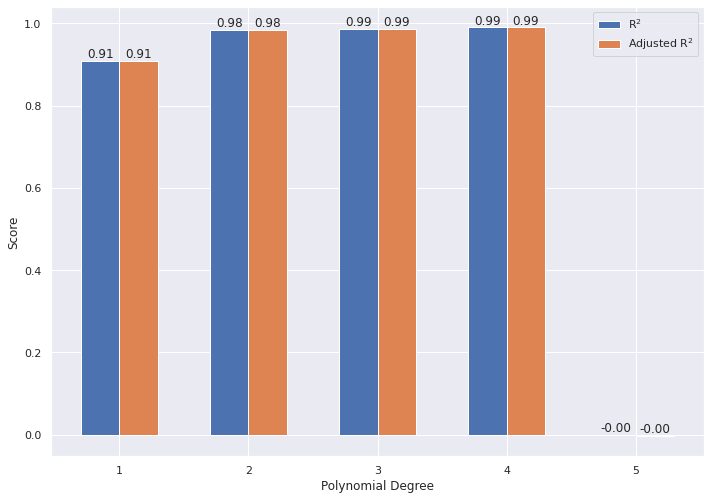

In [14]:
# Compute bar positions
barWidth = 0.3
r1 = range(1, len(mean_r2s)+1)
r2 = [x + barWidth for x in r1]

# Plot bars
r2_bars = plt.bar(r1, mean_r2s, width=barWidth, label="R$^{2}$")
adjusted_r2_bars = plt.bar(r2, mean_adjusted_r2s, width=barWidth, label="Adjusted R$^{2}$")

# Add text to top of bars
for rect in r2_bars + adjusted_r2_bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' %height, ha='center', va='bottom')

# Polish axes
tick_locations = [(r1[i] + r2[i])/2 for i in range(len(r1))]
plt.xticks(tick_locations, labels=r1)
plt.xlabel("Polynomial Degree")
plt.ylabel("Score")
plt.legend()

We can see a few trends:

1. with $n = 1$ we get the same performance as linear regression. Of course! A 1-degree polynomial is the same a fitting a line to the data
2. We can see that the results indicates that we have a real proximity of the results

So, this indicates that a polynomial indicates similar results for each degree